In [46]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

## Implement K-means Clustering with no scikit-learn

In [47]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2))

K = 3 
original_label = np.asarray([0] * N + [1] * N + [2] * N).T # np.asarray != np.array
original_label.shape

(1500,)

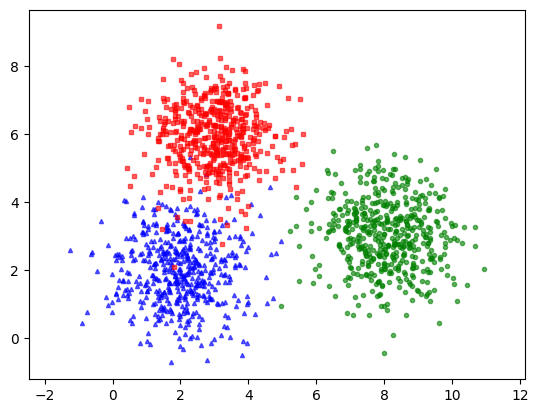

In [48]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 3, alpha = .6)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 3, alpha = .6)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 3, alpha = .6)
    
    plt.axis('equal')
    plt.plot()
    plt.show()

kmeans_display(X, original_label)

In [49]:
def kmeans_init_centers(X, k):
    return X[np.random.choice(X.shape[0], k, replace = False)]

def kmeans_asign_labels(X, centers):
    D = cdist(X, centers)
    #D.shape adu o day print D.shape thi no ko print vi goi ham nay thi no print cai thang return :v
    #print(D.shape) # phai them print moi duoc
    return np.argmin(D, axis = 1)

#kmeans_asign_labels(X, kmeans_init_centers(X, K))

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        Xk = X[labels == k, :]
        centers[k, :] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    return (set([tuple(a) for a in centers])
            == set([tuple(a) for a in new_centers]))

In [50]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_asign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1 # bruh in Python, ++it means nothing, must be it += x
    return (centers, labels, it)

In [51]:
(centers, labels, it) = kmeans(X, K)
print("centers are\n", centers[-1], "\n with ", it, " iterates\n")

centers are
 [[7.11255044 3.86229177]
 [8.56591957 2.56262956]
 [2.43376653 3.93289326]] 
 with  13  iterates



centers are:
 [[48.92119798 91.85605303]
 [ 9.13298617 27.733287  ]
 [17.73373138 59.50647613]
 [43.28593009 41.61155677]] 
 and the number of interates is:  16


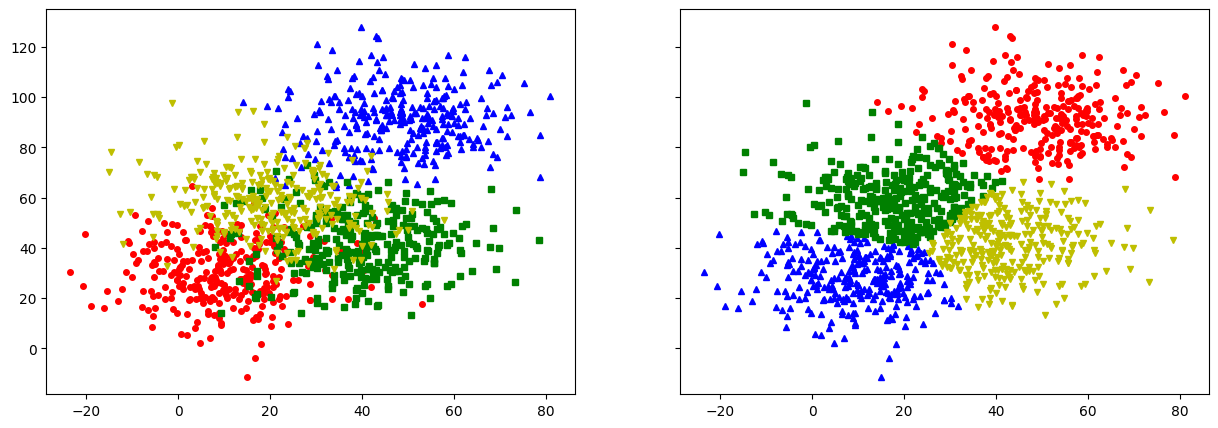

In [52]:
# implement again from the beginning

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

N = 300
K = 4
cov = [[150, 0], [0, 150]]
means = [[10, 30], [50, 90], [40, 40], [20, 60]]

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X3 = np.random.multivariate_normal(means[3], cov, N)
tmp = [X0, X1, X2, X3]
cl = ['ro', 'b^', 'gs', 'yv'] # yv duoc ma ov ko duoc vi 'o' la cua marker roi :))
# no phai la color-marker, va marker thi co ^, v, s, o, d,... -> color phai tranh' nhung tu do ra
X = np.concatenate((X0, X1, X2, X3), axis = 0)

fig, ax = plt.subplots(ncols = 2, figsize = (15, 5), sharex = True, sharey = True)

for i in range(K):
    ax[0].plot(tmp[i][:, 0], tmp[i][:, 1], cl[i], markersize = 4)

# tips for naming is to first name the algo u are doing first
# because when u type "kmeans" it will suggest all the func related to that algo
def kmeans_rd_k_centers(X, K):
    return X[np.random.choice(X.shape[0], K, replace = False)]

def kmeans_relabel(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis = 1)

def kmeans_recenter(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for i in range(K):
        Xk = X[labels == i, :]
        centers[i, :] = np.mean(Xk, axis = 0)
    return centers

def kmeans_isConverged(centers, new_centers):
    return (set([tuple(a) for a in centers])
            == set([tuple(a) for a in new_centers]))
    
def kmeans2(X, K):
    centers = [kmeans_rd_k_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_relabel(X, centers[-1]))
        new_center = kmeans_recenter(X, labels[-1], K)
        if kmeans_isConverged(centers[-1], new_center):
            break
        it += 1
        centers.append(new_center)
    return (centers, labels, it)

(centers, labels, it) = kmeans2(X, K)
print("centers are:\n", centers[-1], "\n and the number of interates is: ", it)

for i in range(K):
    Xk = X[labels[-1] == i, :]
    ax[1].plot(Xk[:, 0], Xk[:, 1], cl[i], markersize = 4)

## Implement Kmeans Clustering using scikit-learn


centers found by sci-kit learn
 [[41.06573875 40.42016529]
 [51.13046039 91.02020153]
 [ 8.6043318  28.02196328]
 [19.35532114 62.35394997]]


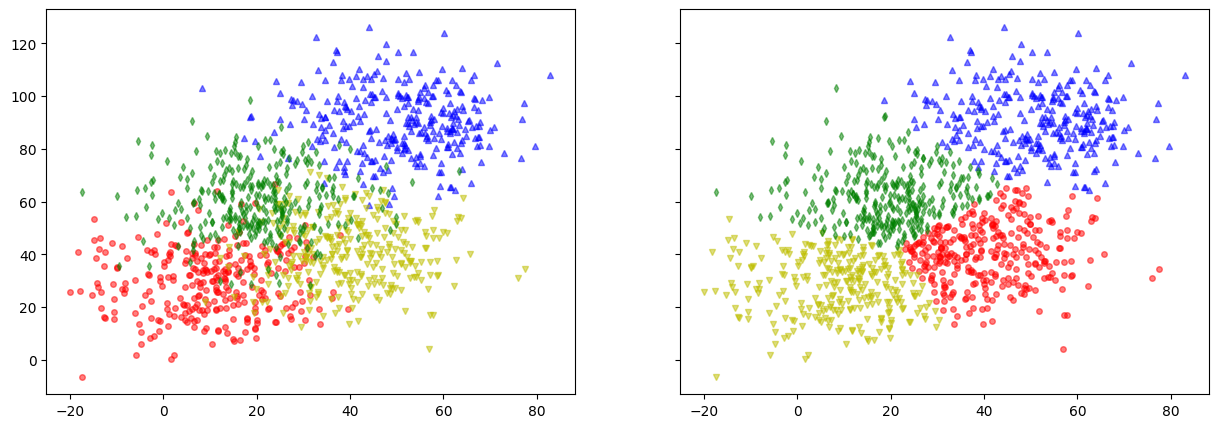

In [53]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

K = 4
N = 300
cov = [[150, 0], [0, 150]]
means = [[10, 30], [50, 90], [40, 40], [20, 60]]

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X3 = np.random.multivariate_normal(means[3], cov, N)
X = np.concatenate((X0, X1, X2, X3), axis = 0)

kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(X)
print("centers found by sci-kit learn\n", kmeans.cluster_centers_)
pred_label = kmeans.predict(X)

tmp = [X0, X1, X2, X3]
cl = ['ro', 'b^', 'yv', 'gd']

fig, ax = plt.subplots(ncols = 2, figsize = (15, 5), sharex = True, sharey = True)

for i in range(K):
    ax[0].plot(tmp[i][:, 0], tmp[i][:, 1], cl[i], markersize = 4, alpha = .5)

for i in range(K):
    Xk = X[pred_label == i, :]
    ax[1].plot(Xk[:, 0], Xk[:, 1], cl[i], markersize = 4, alpha = .5)

In [54]:
lst = [1, 2, 3]
b = [3, 4, 5]
a = set()
# a.add(lst)  Can't because list is not hashable
a.add(tuple(lst))
a.add(tuple(b))
a
x = set([10, 4, 6]) # set(?) ? must be a iterable data type so that set can access and extract all elements in that
y = set((1, 2))
x
y

{1, 2}

In [55]:
import matplotlib.image as mpimage
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.cluster import KMeans

pic = os.path.join('VLT.jpg')
img = mpimage.imread(pic)


[[0.47659971 0.45080235 0.46412097]
 [0.47659971 0.45080235 0.46412097]
 [0.47659971 0.45080235 0.46412097]
 ...
 [0.70609549 0.69605485 0.71501975]
 [0.70609549 0.69605485 0.71501975]
 [0.70609549 0.69605485 0.71501975]]


(np.float64(-0.5), np.float64(999.5), np.float64(999.5), np.float64(-0.5))

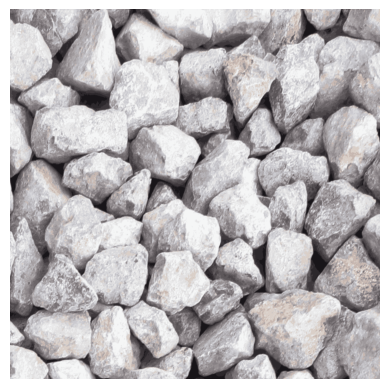

In [84]:
#print(img.shape)
#plt.imshow(img)
#plt.axis('off')
img2 = img.reshape(img.shape[0] * img.shape[1], img.shape[2])
img2 = img2.copy() # since reshape doesnt allow u to modify -> must create a copy first
#print(img2.shape)

kmeans = KMeans(n_clusters = 20, random_state = False).fit(img2)
pred_label = kmeans.predict(img2)
centers = kmeans.cluster_centers_
#print(centers)

for i in range(20):
    img2[pred_label == i, :] = centers[i, :]

print(img2)
    
img2 = img2.reshape(img.shape[0], img.shape[1], img.shape[2])
plt.imshow(img2)
plt.axis('off')


Original shape: (1000, 1000, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


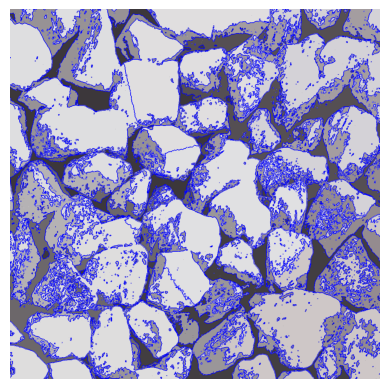

In [105]:
pic = 'rocks.jpg'
img = mpimage.imread(pic)

Nc = 15

if img.max() > 1:
    img = img / 255.0

plt.imshow(img)
plt.axis('off')
print(f"Original shape: {img.shape}")

H, W, C = img.shape
tmp = np.zeros((H, W, C + 2))
for i in range(H):
    for j in range(W):
        tmp[i, j, 0:3] = img[i, j, 0:3]
        tmp[i, j, 3] = i / H
        tmp[i, j, 4] = j / W

img2 = tmp.reshape(-1, tmp.shape[2])
model = KMeans(n_clusters = Nc, random_state = 42).fit(img2)
pred_label = model.labels_
centers = model.cluster_centers_
label2D = pred_label.reshape(H, W)


img3 = np.zeros((img2.shape[0], 3), dtype = float)
for i in range(Nc):
    img3[pred_label == i, 0:3] = centers[i, 0:3]
    
img3 = img3.reshape(H, W, C)

dx = [0, 1, 1, -1, 0, -1, 1, -1]
dy = [1, 0, 1, -1, -1, 1, -1, 0]

for i in range(H):
    for j in range(W):
        cnt = 0
        for k in range(8):
            ni = i + dx[k]
            nj = j + dy[k]
            if 0 <= ni < H and 0 <= nj < W and label2D[i, j] != label2D[ni, nj]:
                cnt += 1
        if 1 < cnt < 5:
            img3[i, j, :] = np.array([0, 0, 255])

plt.imshow(img3)